## Day 20 Assignment

## Question 1:
    
Anova

Three archers – Pat, Jack, and Alex are participating in an archery contest. They are shooting at
targets with 10 evenly spaced concentric rings. The rings have score values from 1 through 10
assigned to them, with 10 being the highest. Each participant shoots 6 arrow, scoring the
following points:

Pat – 5, 4, 4, 3, 9, 4

Jack – 4, 8, 7, 5, 1, 5

Alex – 9, 9, 8, 10, 4, 10

Based on the above results we would like to know who the best archer is. In other words our null
hypothesis is that the means of all populations are equal.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/Users/Pooja/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
P = [5,4,4,3,9,4]
J = [4,8,7,5,1,5]
A = [9,9,8,10,4,10]

In [3]:
combined_score= P + J + A
combined_score

[5, 4, 4, 3, 9, 4, 4, 8, 7, 5, 1, 5, 9, 9, 8, 10, 4, 10]

In [4]:
archer_names = ( (['P']*len(P)) + (['J']*len(J)) + (['A']*len(A)) )

In [5]:
data= pd.DataFrame({'archer_names':archer_names,'score':combined_score})

In [6]:
data

,archer_names,score
0,P,5
1,P,4
2,P,4
3,P,3
4,P,9
5,P,4
6,J,4
7,J,8
8,J,7
9,J,5


In [7]:
data.groupby('archer_names').mean()

,score
archer_names,
A,8.333333
J,5.000000
P,4.833333


### Define hypothesis

#### H0: 
     mean(A) = mean(J) = mean(P)
    (the means of all populations are equal )
    
#### H1: 
     mean(A) != mean(J) != mean(P) or
     mean(A) != mean(J) = mean(P) or
     mean(A) = mean(J) != mean(P)
    (atleast one pair of mean is different)   

In [8]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [9]:
linear_model= ols('score ~ archer_names',data=data).fit()

In [10]:
table= sm.stats.anova_lm(linear_model)
table

,df,sum_sq,mean_sq,F,PR(>F)
archer_names,2.0,46.777778,23.388889,4.488273,0.029668
Residual,15.0,78.166667,5.211111,NaN,NaN


### Conclude:

Here, p value(0.029) is < 0.05 singnificance. 

Thus, We Reject Null(H0) hypothesis. At least one of the means is different whichi is comes from at least one other population mean.

We can say that there is a significant difference between archers.(we can say that all archers are not perform equally)

### Who is best Archer ?

For finding which archer perform best, we have to use the **tukey method**. This test compares all possible pairs and identify the difference between means and which is greater than other mean.

### Post hoc analysis(Tukey's Method)

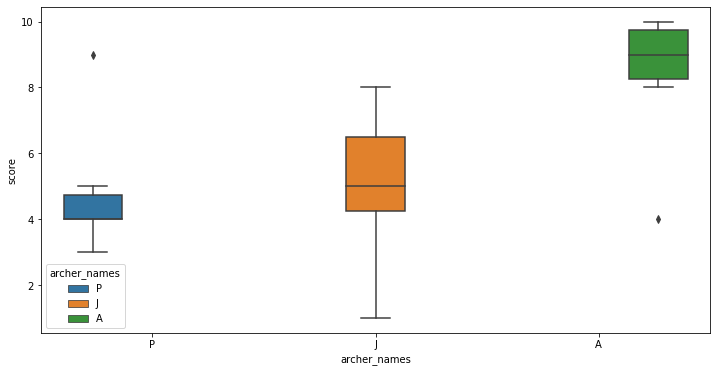

In [11]:
plt.figure(figsize=(12,6))
sns.boxplot(x='archer_names',y='score',data=data,hue='archer_names')

In [12]:
#Reject H0 if |mean diff between group(meandiff)| >= LSD

In [13]:
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(data['score'],data['archer_names'])
mc_results = mc.tukeyhsd(alpha=0.05)
print(mc_results.summary())

#In last column reject, if reject is False means the means the means are equal, and 
#reject is True means the means of the two group is not equal

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     A      J  -3.3333 0.0568 -6.7554 0.0887  False
     A      P     -3.5 0.0447  -6.922 -0.078   True
     J      P  -0.1667    0.9 -3.5887 3.2554  False
---------------------------------------------------


### Conclude

Based on the above data, for the group (A & P) the means are unequal,we reject the null hypothesis and also the mean difference is very less compare to other groups.

So,we can say that **A(alex)** is the **best archer**.